In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ruta = r"C:\Users\004543613\Downloads\Datos+Meteorológicos_Arg_2023.csv"
df = pd.read_csv(ruta)
df.head()

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9


In [3]:
# Pasar fecha a datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df.head()

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,2023-01-01,Buenos Aires,27,18,0.0,22.7,68.8
1,2023-01-01,Cordoba,35,18,0.0,33.8,61.7
2,2023-01-01,Rosario,23,21,0.0,10.6,80.0
3,2023-01-01,Mendoza,35,21,0.0,23.8,76.8
4,2023-01-01,Tucuman,36,18,17.2,25.7,54.9


In [4]:
# Crear variables ciudades y meses
lista_ciudades = []
for ciudad in df['Ciudad']:
    if ciudad not in lista_ciudades:
        lista_ciudades.append(ciudad)
lista_ciudades

['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']

In [5]:
diccionario_meses = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

In [10]:
# Funcion de consulta temperaturas
def consultar_temperaturas():
    while True:
        #Solicitar ciudad
        print("\nCiudades disponibles: ", lista_ciudades)
        ciudad_elegida = input('Elegi la ciudad: ').title()
        
        #Solicitar mes
        mes_elegido = int(input('Elegi el mes: ej -> 1 = Enero'))
        
        #Validar inputs
        if ciudad_elegida not in lista_ciudades or mes_elegido not in range(1,13):
            print('Error con la ciudad o el mes elegido')
            continue #para iterar desde cero de nuevo
            
        #Crear df filtrado
        datos_ciudad_mes = df[(df['Ciudad'] == ciudad_elegida) & (df['Fecha'].dt.month == mes_elegido)]
        
        #Graficamos el df
        plt.figure(figsize=(10,6))
        plt.plot(datos_ciudad_mes['Fecha'], datos_ciudad_mes['Temperatura Maxima'], label="Maxima", color='red')
        plt.plot(datos_ciudad_mes['Fecha'], datos_ciudad_mes['Temperatura Minima'], label="Minimo", color='blue')
        plt.title(f'Temperaturas en {ciudad_elegida} durante el mes de {diccionario_meses[mes_elegido]}')
        plt.xlabel("Fecha")
        plt.ylabel("Temperatura")
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()
        
        #Seguir o no?
        otra_consulta = input('Desea seguir? (s/n)')
        if otra_consulta.lower() != 's':
            break


Ciudades disponibles:  ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']


Elegi la ciudad:  buenos aires
Elegi el mes: ej -> 1 = Enero 4


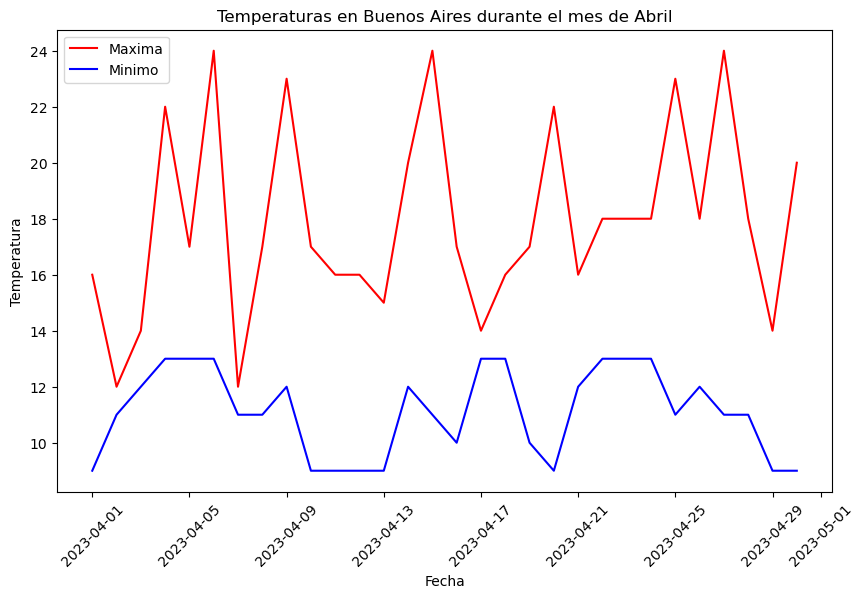

Desea seguir? (s/n) n


In [11]:
consultar_temperaturas()